In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
path = "/home/carlo/GitHub/ExplainableImageNet/data"
ds = tf.data.Dataset.load(path)
ds.element_spec

{'is_problematic': TensorSpec(shape=(), dtype=tf.bool, name=None),
 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None),
 'unclear_multi_labels': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'file_name': TensorSpec(shape=(), dtype=tf.string, name=None),
 'original_label': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'correct_multi_labels': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'wrong_multi_labels': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}

In [8]:
for el in ds.take(5):
  print(el["is_problematic"])

tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)


tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)


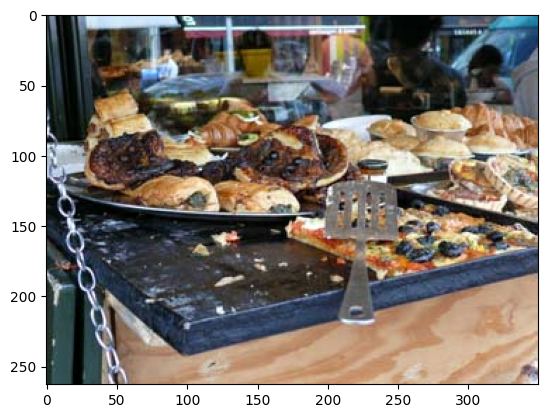

In [23]:
for el in ds.take(2):
    plt.imshow(el["image"])
    print(el['is_problematic'])

In [28]:
def resize_with_crop(image):
    i = image
    i = tf.cast(i["image"], tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.mobilenet_v2.preprocess_input(i)
    return (i)


ds_minified = ds.map(resize_with_crop)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


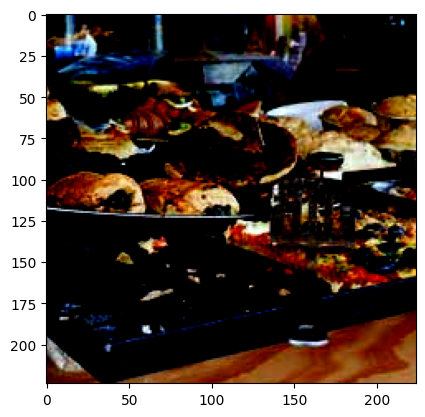

In [30]:
for el in ds_minified.take(2):
    plt.imshow(el)